**Vamos experimentar agora o algoritmo Random Forest?**

Veja: Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier

In [3]:
import pickle
with open('Titanic.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [4]:
X_treino

,Pclass,Sex,Age,SibSp,Parch,Fare
331,1,1,45.5,0,0,28.5000
733,2,1,23.0,0,0,13.0000
382,3,1,32.0,0,0,7.9250
704,3,1,26.0,1,0,7.8542
813,3,0,6.0,4,2,31.2750
...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500
270,1,1,30.0,0,0,31.0000
860,3,1,41.0,2,0,14.1083
435,1,0,14.0,1,2,120.0000


In [5]:
modelo = RandomForestClassifier(n_estimators=80, max_features=3, criterion='gini', random_state = 42)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(max_features=3, n_estimators=80, random_state=42)



> **Vamos testar o modelo?**



In [6]:
previsoes = modelo.predict(X_teste)

In [7]:
previsoes

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])



> **Será se o modelo acertou?**



In [8]:
y_teste

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.8044692737430168

In [10]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[90, 15],
       [20, 54]])

c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8044692737430168

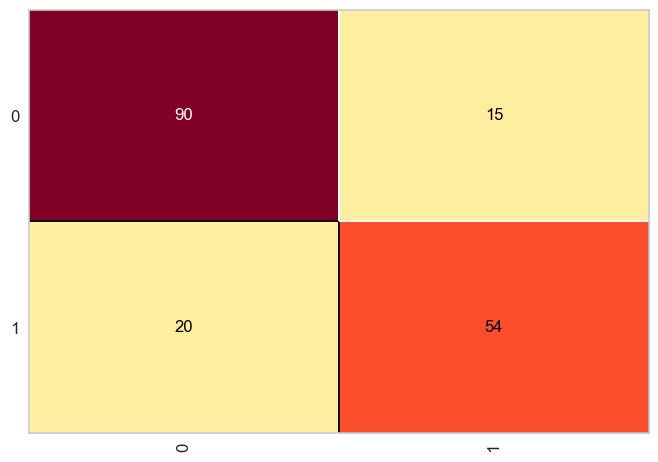

In [11]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [12]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



**Vamos ver os atributos que o Random considerou como mais importantes?**

Variáveis mais relevantes:
Fare: 0.29195449530876844
Sex: 0.28163853057804633
Age: 0.2522081157337287
Pclass: 0.09302244410928699
SibSp: 0.04826605328561663
Parch: 0.03291036098455308


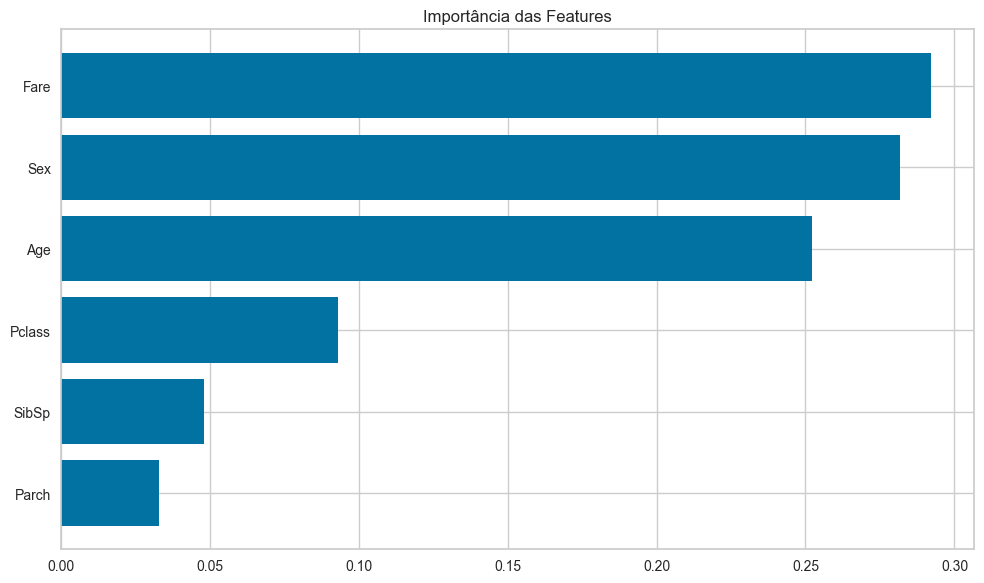

In [13]:
# Obter a importância das features
importancias = modelo.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = X_treino.columns

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
plt.yticks(range(X_treino.shape[1]), nomes_das_features[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()